In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster

## Pokémon sightings

### There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x and y, respectively.

-    Import the pyplot class from matplotlib library as plt.
-    Create a scatter plot using the pyplot class.
-    Display the scatter plot created in the earlier step.

In [2]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

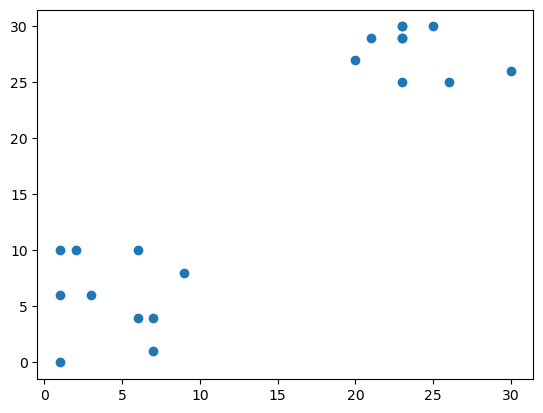

In [3]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

## Pokémon sightings: hierarchical clustering

### We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering.

### 'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

-    Import the linkage and fcluster libraries.
-    Use the linkage() function to compute distances using the ward method.
-    Generate cluster labels for each data point with two clusters using the fcluster() function.
-    Plot the points with seaborn and assign a different color to each cluster.

In [4]:
df = pd.DataFrame({"x": x, "y": y})
df['x'] = df['x'].astype('float32')
df['y'] = df['y'].astype('float32')

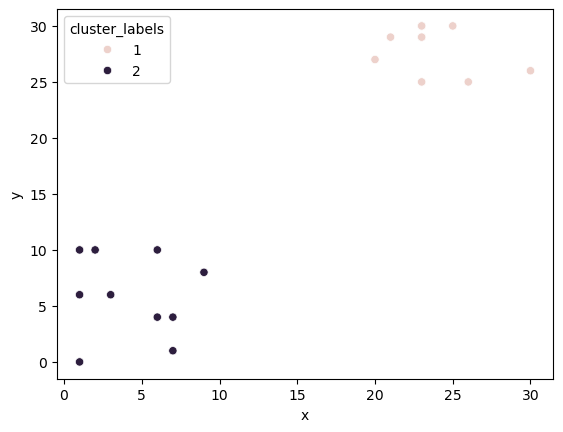

In [5]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

## Pokémon sightings: k-means clustering

### We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

### x and y are columns of X and Y coordinates of the locations of sightings, stored in a pandas DataFrame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

-    Import the kmeans and vq functions.
-    Use the kmeans() function to compute cluster centers by defining two clusters.
-    Assign cluster labels to each data point using vq() function.
-    Plot the points with seaborn and assign a different color to each cluster

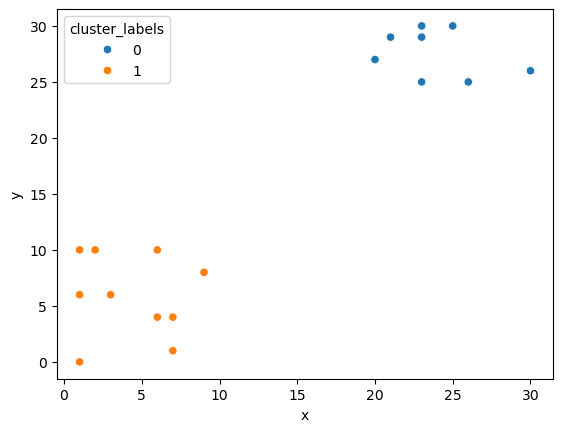

In [6]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

## Normalize basic list data

### Now that you are aware of normalization, let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

-    Import the whiten function.
-    Use the whiten() function to standardize the data.

In [7]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


## Visualize normalized data

### After normalizing your data, you can compare the scaled data to the original data to see the difference. The variables from the last exercise, goals_for and scaled_data are already available to you.

-    Use the matplotlib library to plot the original and scaled data.
-    Show the legend in the plot.
-    Display the plot.

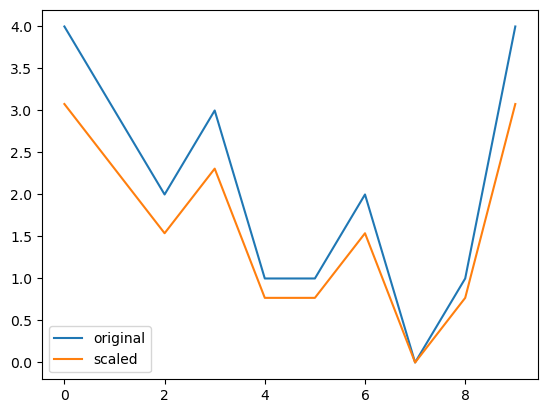

In [8]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

## Normalization of small numbers

### In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt.

-    Scale the list rate_cuts, which contains the changes in interest rates.
-    Plot the original data against the scaled data.

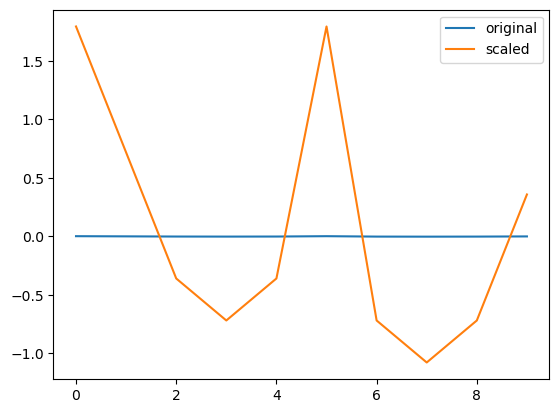

In [9]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

## FIFA 18: Normalize data

### FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

### The data for this exercise is stored in a pandas DataFrame, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.

-    Scale the values of eur_wage and eur_value using the whiten() function.

In [11]:
fifa = pd.read_csv('../../data/fifa_18_sample_data.csv')

In [12]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

-    Plot the scaled wages and transfer values of players using the .plot() method of pandas.

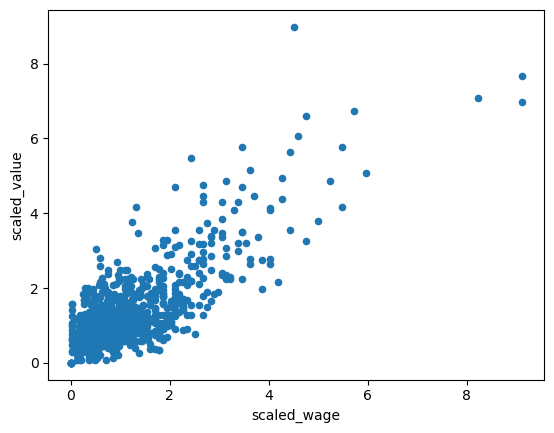

In [13]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

-    Check the mean and standard deviation of the scaled data using the .describe() method of pandas.

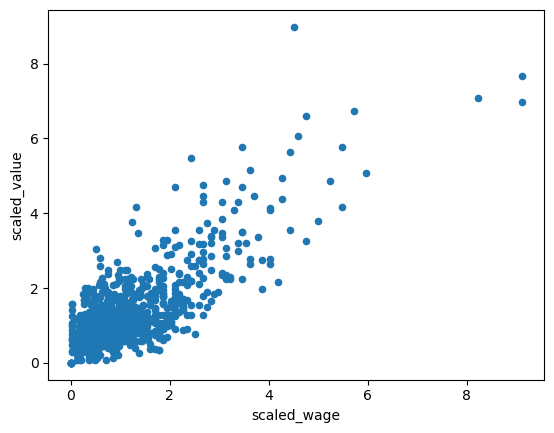

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [14]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())